# Business Problem

"It’s difficult to overstate just how much the COVID-19 pandemic has devastated airlines. In 2020, industry revenues totaled $328 billion, around 40 percent of the previous year’s. In nominal terms, that’s the same as in 2000. The sector is expected to be smaller for years to come; we project traffic won’t return to 2019 levels before 2024" - McKinsey

Airline should devise the strategies to adapt. To support strategic decision-making on how to allocate their investment effeciently, as a data analyst, we would provide an insight from the airline satisfaction survey data to **identify key areas of improvement that will have the strongest impact on passenger satisfaction**.

# Data

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

### Data Understanding

Before we analyze the data, it is important to understand the data to detect missing values, duplicate, anomalies, and incorrect data types.

In [4]:
df = pd.read_csv('airline passanger satisfaction.csv')

Table Dimension:

In [5]:
df.shape

(103904, 25)

Here an overview of data set:

In [6]:
display(df.head(),df.tail())

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


Table Description:
   1. **Gender**: Gender of the passengers
   2. **Customer Type**: The customer type
   3. **Age**: The actual age of the passengers
   4. **Type of Travel**: Purpose of the flight of the passengers
   5. **Class**: Travel class in the plane of the passengers
   6. **Flight Distance**: The flight distance of this journey
   7. **Inflight wifi service**: Satisfaction level of the inflight wifi service
   8. **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient
   9. **Ease of Online booking**: Satisfaction level of online booking
   10. **Gate location**: Satisfaction level of Gate location
   11. **Food and drink**: Satisfaction level of Food and drink
   12. **Online boarding**: Satisfaction level of online boarding
   13. **Seat comfort**: Satisfaction level of Seat comfort
   14. **Inflight entertainment**: Satisfaction level of inflight entertainment
   15. **On-board service**: Satisfaction level of On-board service
   16. **Leg room service**: Satisfaction level of Leg room service
   17. **Baggage handling**: Satisfaction level of baggage handling
   18. **Check-in service**: Satisfaction level of Check-in service
   19. **Inflight service**: Satisfaction level of inflight service
   20. **Cleanliness**: Satisfaction level of Cleanliness
   21. **Departure Delay in Minutes**: Minutes delayed when departure
   22. **Arrival Delay in Minutes**: Minutes delayed when Arrival
   23. **Satisfaction**: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [8]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,103904,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 8..."
2,Gender,2,"[Male, Female]"
3,Customer Type,2,"[Loyal Customer, disloyal Customer]"
4,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3..."
5,Type of Travel,2,"[Personal Travel, Business travel]"
6,Class,3,"[Eco Plus, Business, Eco]"
7,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 8..."
8,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
9,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [10]:
df.describe(include = 'object').T

,count,unique,top,freq
Gender,103904,2,Female,52727
Customer Type,103904,2,Loyal Customer,84923
Type of Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
satisfaction,103904,2,neutral or dissatisfied,58879


From information above, we may notice the following:
* Airline passenger satisfaction data set has **103904 rows and 25 columns**. Each row consist of one passenger and each column consist of specific feature.
* `Unnamed: 0` and `id` consist of an unique information of passengers, and haven't correlation to target (satisfaction). We can drop the columns. 
* `Arrival Delay in Minutes` column has **310 missing values**.  We can see the proportion first before we decide to handle.
* Each row consist of an information in one flight; `Arrival Delay in Minutes`and `Departure Delay in Minutes` are related each other if the flight was delayed at departure, then the flight will be delayed at landing too. We can combine both of column to new column (**Total Delay**).
* `Class` column has 3 unique value, we can simplify to 2 value (**Business and Economy**) like other categorical columns.
*  `Flight Distance`, `Arrival Delay in Minutes`, and `Departure Delay in Minutes` columns have **significantly different** value of **Q3 and max**, it might be an outlier. We can visualize to check

### Data Cleaning

From inisght above, we can handle the missing values, duplicate, anomalies, and incorrect data types so that our analysis won't be biased or inaccurate.

In [11]:
# Drop unnecesary columns
df = df.drop(df.iloc[:,[0, 1]], axis = 1)

In [12]:
# Check proportion missing values
total = df[['Arrival Delay in Minutes']].isnull().sum()
percent = df[['Arrival Delay in Minutes']].isnull().sum()/df[['Arrival Delay in Minutes']].isnull().count()*100
missing = pd.concat([total, percent], axis=1, keys=['Total Missing Values', 'Percent (%)'])
missing

,Total Missing Values,Percent (%)
Arrival Delay in Minutes,310,0.298352


*missing value* on `Arrival Delay in Minutes` has low proportion (0.298352%) compared to all data, we can drop it from data set.

In [13]:
# Handling missing values
df = df.dropna(axis=0)

In [14]:
# Add new column
df.insert(20,'Total Delay',df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes'])

In [15]:
df = df.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1)

In [16]:
# Simplified unique value in class column
df['Class'] = df['Class'].map({'Eco':'Economy','Eco Plus':'Economy','Business':'Business'})

In [17]:
# Check for duplicates
df.duplicated().sum()

0

<AxesSubplot:xlabel='Total Delay'>

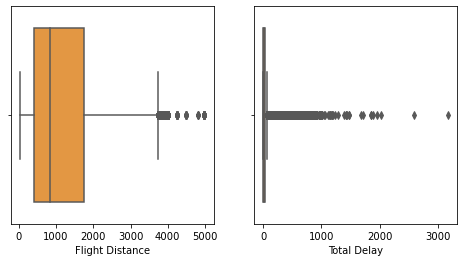

In [18]:
# check for outliers
f, ax = plt.subplots(1, 2, figsize = (8,4))
sns.boxplot(x = "Flight Distance", palette = "YlOrBr", data = df, ax = ax[0])
sns.boxplot(x = "Total Delay", palette = "YlOrBr", data = df, ax = ax[1])

From boxplot above, it shows that `Flight Distance` and `Total Delay` might have outliers but the outliers above are not anomalies. It is possible if the flight distance is 4983 mil (compared to singapore to new york: 9300 mil) and the total delay reaches 3176 min/53 hours (compared to The Pam Am Pacific Clipper was delayed by a week on the day of the Pearl Harbour attacks on 7th December 1941).

p.s : 
* Flight Delayed By 160 Hours—The Longest And Strangest Flight Delays : https://www.forbes.com/sites/jamesasquith/2020/01/03/flight-delayed-by-160-hours-the-longest-and-strangest-flight-delays/?sh=24fff55e38a5
* World's Longest Non-Stop Flight To Operate By End Of 2025 : https://www.ndtv.com/world-news/qantas-non-stop-flights-longest-duration-flights-worlds-longest-non-stop-flight-to-operate-by-end-of-2025-2939221

So, we dont need to removing those outliers, it might be biased in analysis.

In [19]:
# Check for duplicates
df.duplicated().sum()

0

After pre-processing, we have data with table dimension:

In [20]:
df.shape

(103594, 22)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

#### Data Preparation Results:
* Missing value: Treated
* Duplicates: None
* Anomalies: None

Here is a preview of our cleaned data :

In [22]:
df.sample(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay,satisfaction
18677,Male,Loyal Customer,53,Business travel,Business,1035,2,2,2,2,...,4,3,3,3,3,4,3,5,0.0,satisfied
16870,Female,Loyal Customer,38,Business travel,Business,3392,5,5,5,5,...,5,4,4,4,4,4,4,3,0.0,satisfied
26418,Male,Loyal Customer,48,Business travel,Business,2676,3,4,4,4,...,3,3,3,3,3,3,3,2,0.0,neutral or dissatisfied
38752,Male,Loyal Customer,13,Personal Travel,Economy,1744,4,5,5,3,...,4,4,5,3,4,4,5,4,72.0,neutral or dissatisfied
3431,Male,disloyal Customer,25,Business travel,Business,834,4,0,4,2,...,3,3,5,2,4,4,5,3,5.0,neutral or dissatisfied
4452,Male,Loyal Customer,30,Business travel,Business,566,1,2,4,2,...,1,1,4,3,4,1,3,1,0.0,neutral or dissatisfied
54070,Male,Loyal Customer,55,Personal Travel,Economy,651,2,5,2,2,...,1,1,2,3,2,3,4,1,0.0,neutral or dissatisfied
71940,Female,Loyal Customer,47,Business travel,Business,3401,4,2,2,2,...,3,4,4,4,4,1,4,4,0.0,neutral or dissatisfied
89891,Female,disloyal Customer,46,Business travel,Economy,373,1,2,2,3,...,2,2,2,2,4,3,3,2,12.0,neutral or dissatisfied
36909,Male,Loyal Customer,50,Business travel,Business,3589,3,4,3,4,...,3,3,3,3,3,3,3,2,111.0,neutral or dissatisfied


 # Exploratory Data Analysis

Saving dataframe in excel format for tableau visualization:

In [23]:
df.to_excel("airline_satistfaction.xlsx", index=None)

**Framework**:
* Measure passenger satisfaction by segment
* Identify the factor that have the strongest impact on passenger satisfaction
* Analyze detailed attributed to define clear and specific improvement actions

In [24]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

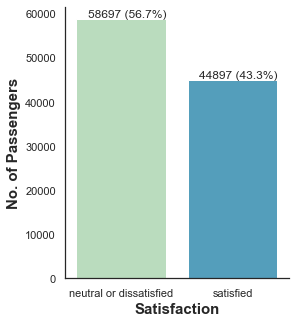

In [25]:
sns.set(style='white',font_scale=1)
fig = plt.figure(figsize=[4,5])

ax = sns.countplot(data=df,x='satisfaction',palette='GnBu')
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
sns.despine()
plt.savefig('plot1.png',transparent=True, bbox_inches='tight')

The number of passenger who satisfied are 58697 (56.7%) while Neutral/Dissatisfied are 44897 (43.6%). There is sastisfaction gap about **13,1%**.

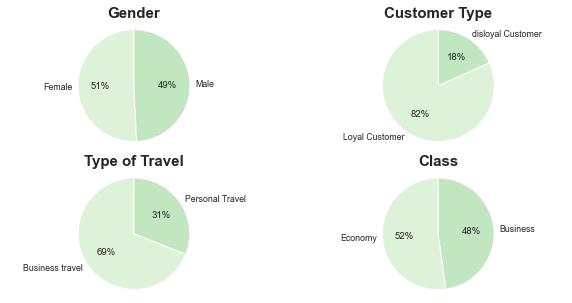

<Figure size 432x288 with 0 Axes>

In [26]:
categorical_indexes = [0,1,3,4]
categ = df.iloc[:,categorical_indexes]
sns.set(style='white',font_scale=0.8)
fig, axes = plt.subplots(2, 2, figsize = (10,5))
for i, col in enumerate(categ):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes, labels = labels, colors = sns.color_palette("GnBu"),autopct = '%1.0f%%', startangle = 90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col, size = 15, fontweight="bold")
plt.show()
plt.savefig('plot2.png',transparent=True, bbox_inches='tight')

* **Gender**: proportion between female and male around 51:49 (balanced)
* **Customer type**: proportion between loyal and disloyal customer around 82:18 
* **Type of travel**: proportion between business and personal customer around 69:31
* **Class**: proportion between economy and business class around 52:48

### EDA based on: `Gender`

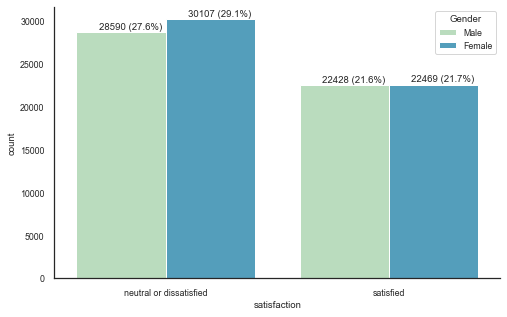

In [27]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df,x='satisfaction',hue='Gender',palette='GnBu')
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
sns.despine()
plt.savefig('plot3.png',transparent=True, bbox_inches='tight')

**Passenger satisfaction by `Gender`**: The number of passenger who neutral/dissatisfied are higher compared to number of passenger who satisfied both of female or male.

### EDA based on: `Customer Type`

In [28]:
df_ct = pd.crosstab(df['Customer Type'],df['Class'], colnames=['Class'], rownames=['Customer Type'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct

Class,Business,Economy,Total
Customer Type,,,
Loyal Customer,42191,42471,84662
disloyal Customer,7342,11590,18932


**Customer Type and Class**: The class chosen by loyal customer are balanced between economy and business class (51:49)

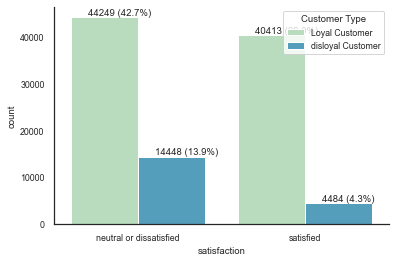

In [29]:
ax = sns.countplot(data=df,x='satisfaction',hue='Customer Type',palette='GnBu')
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))  
sns.despine()
plt.savefig('plot4.png',transparent=True, bbox_inches='tight')

**Passenger satisfaction by `Customer Type`**: Even among loyal passengers which are high in number, the number who neutral/dissatisfied are higher compared to sastisfied (43:39)

### EDA based on: `Type of Travel`, `Class`, and `Flight Distance`

In [30]:
df_ct = pd.crosstab(df['Type of Travel'],df['Class'], colnames=['Type of Travel'], rownames=['Class'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct

Type of Travel,Business,Economy,Total
Class,,,
Business travel,47384,24081,71465
Personal Travel,2149,29980,32129


**Type of Travel and Class** : For business purposes, passengers prefer to use business class, while for personal purposes, passengers prefer to use economy class.

In [31]:
df_ct1 = pd.crosstab(df['satisfaction'],df['Class'], colnames=['Class'], rownames=['Satisfaction'])
df_ct1

Class,Business,Economy
Satisfaction,,
neutral or dissatisfied,15143,43554
satisfied,34390,10507


In [32]:
from scipy.stats import chi2_contingency

print(f'Ho: class and satisfaction independent (tidak berhubungan)')
print(f'Ha: class and satisfaction dependent (berhubungan)')

# Uji statistik untuk mengetahui independency dari variabel class and satisfaction
stats, pvalue, dof, expected = chi2_contingency(df_ct1)

# Conclusion
alpha = 0.05
print(f'p-value: {pvalue}')
print()

if pvalue > 0.05:
    print(f'pvalue > 0.05, fail to reject Ho : kedua variabel tidak berkaitan atau independen')
else:
    print(f'pvalue < 0.05, reject Ho : kedua variabel berkaitan atau dependen')

Ho: class and satisfaction independent (tidak berhubungan)
Ha: class and satisfaction dependent (berhubungan)
p-value: 0.0

pvalue < 0.05, reject Ho : kedua variabel berkaitan atau dependen


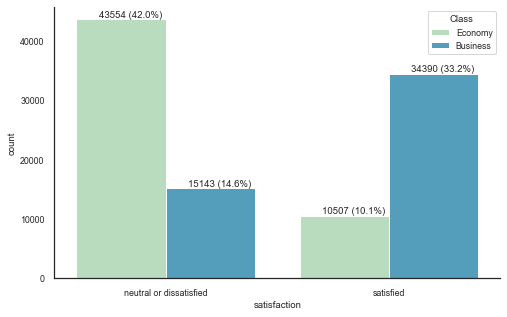

In [33]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df,x='satisfaction',hue='Class',palette='GnBu')
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))  

sns.despine()
plt.savefig('plot5.png',transparent=True, bbox_inches='tight')

**Passenger satisfaction by `Class`**: The passengers who flew in economy class were dissatisfied with the flight, and who flew in business class were satisfied.

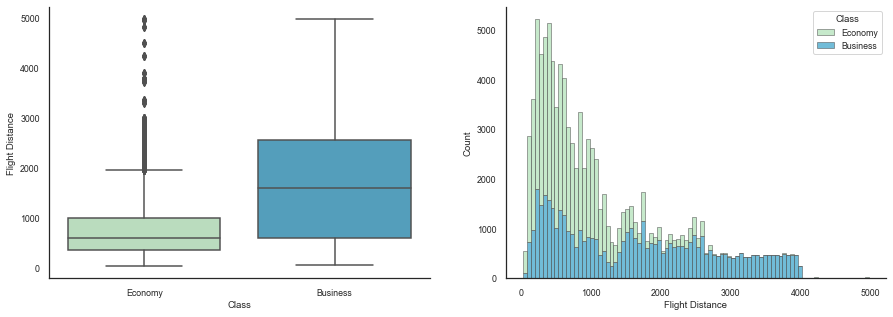

In [34]:
fig,ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = 'GnBu', data = df, ax = ax[0])
sns.histplot(df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = 'GnBu', edgecolor = ".3", linewidth = .5, ax = ax[1])
sns.despine()
plt.savefig('plot6.png',transparent=True, bbox_inches='tight')

**Flight Distance and Class**: The passengers whose flight distance is long, mostly fly in business class.

In [35]:
# cek distribusi kolom Flight Distance
from scipy.stats import normaltest
stats, pval=normaltest(df['Flight Distance'])
if pval<=0.05:
    print('Tidak Normal') #Ha
else: 
    print('Distribusi Normal') #Ho 

Tidak Normal


In [36]:
# uji statistik, apakah ada perbedaan flight distance dengan satisfction penumpang
# karena distribusi data tidak normal, gunakan mann whitney
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['satisfaction']==i]['Flight Distance'] for i in df['satisfaction'].unique()], alternative='less')
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


**Satisfaction by `Flight Distance`**: There is a difference in the satisfaction of passengers with long flights and short flights

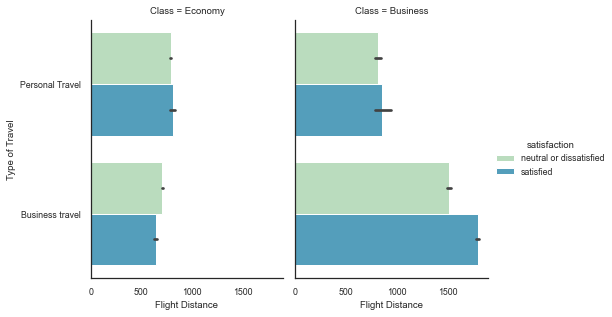

In [37]:
# Type_of_Travel and Flight_Distance by Class
sns.axes_style('white')
sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", palette = 'GnBu', data=df, kind="bar", height=4.5, aspect=.8)
plt.savefig('plot7.png',transparent=True, bbox_inches='tight')

**Type of travel, class, and flight distance**: For business travel in business class category, the number of satisfied passengers are higher for longer flight distance. For other combinations, the distribution almost balanced both of satisfied and dissatisfied passengers.

### EDA based on: `Age`  and `Class`

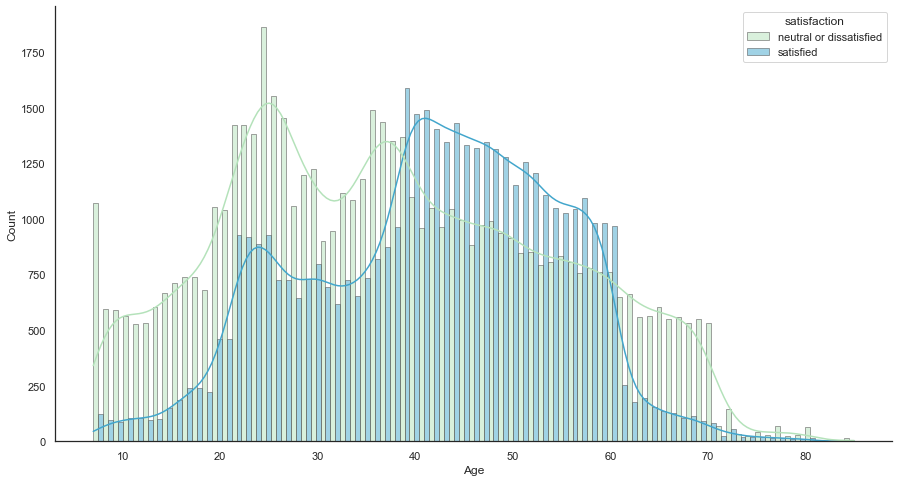

In [38]:
sns.set(style='white',font_scale=1)
fig = plt.subplots(figsize = (15,8))
ax2 = sns.histplot(df, x = "Age", hue = "satisfaction", multiple = "dodge", palette = "GnBu", kde = True, edgecolor = ".3", linewidth = .5)
sns.despine()
plt.savefig('plot8.png',transparent=True, bbox_inches='tight')

**Satisfaction by `Age`**: From age 7-to-38 and from age 61-to-79, quotient of dissatisfied passengers is very high compared to satisfied passengers. On the contrary, in age range 39-60, quotient of satisfied passengers is higher compared to dissatisfied passengers.

### EDA based on satisfaction factor:
`Inflight wifi service`,`Departure/Arrival time convenient`,`Ease of Online booking`,`Gate location`,`Food and drink`,`Online boarding `, `Seat comfort `,`Inflight entertainment`,`On-board service`,`Leg room service`,`Baggage handling`,`Checkin service`,`Inflight service`,`Cleanliness`,`Total Delay`,`Flight Distance`

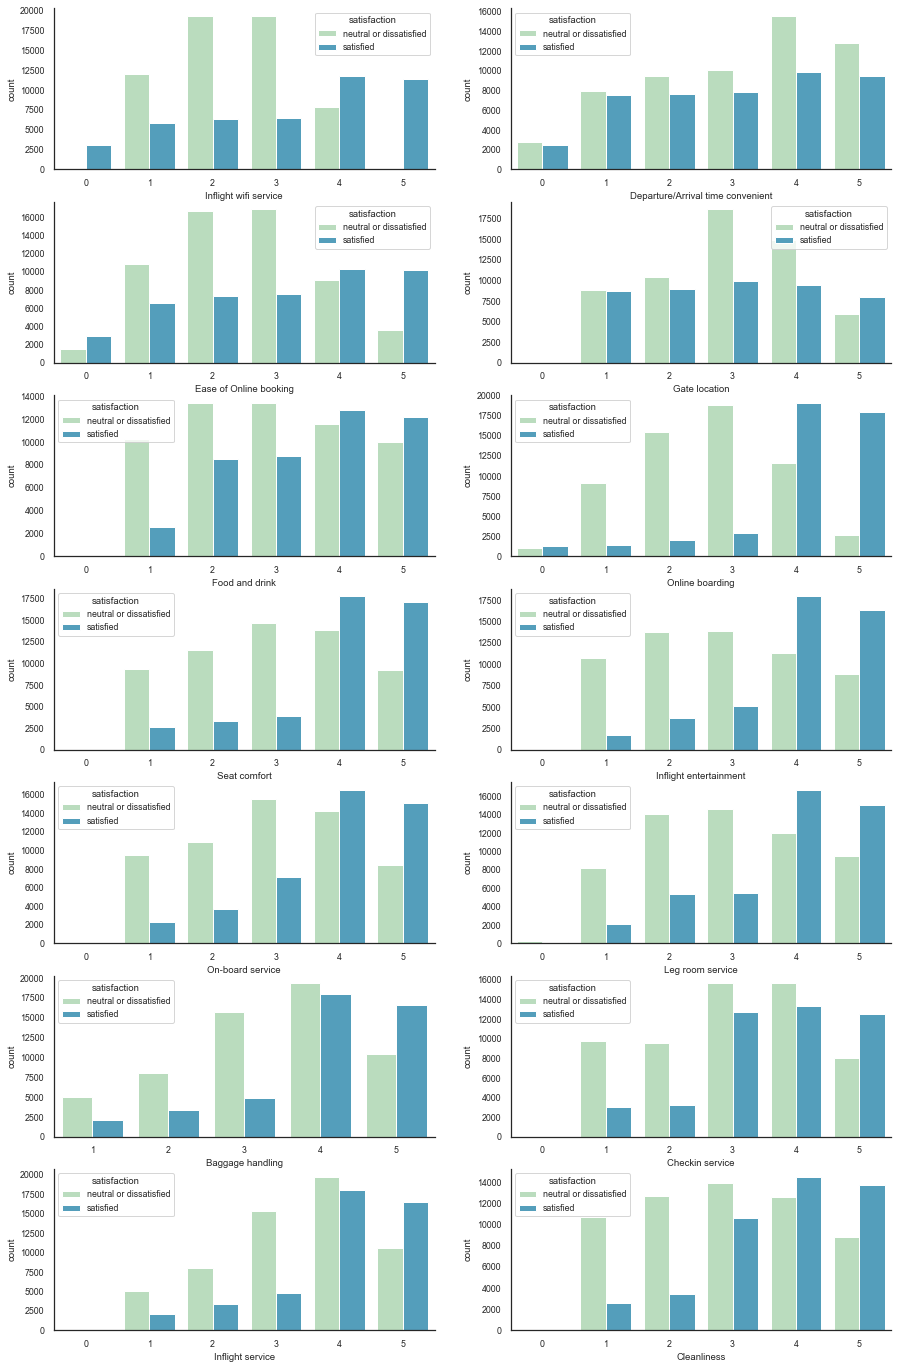

In [39]:
sns.set(style='white',font_scale=0.8)
fig = plt.figure(figsize=[15,35])
for i in range(6,20):
    fig.add_subplot(10, 2, i+1)
    sns.countplot(data=df,x=df.columns[i],hue='satisfaction',palette='GnBu')

sns.despine()
plt.savefig('plot10.png',transparent=True, bbox_inches='tight')

**Inflight wifi service**: almost all passengers who rated the wifi service 5 out of 5 points were satisfied with the flight.

**Seat comfort and leg room service**: most passengers who rated the comfort of the seats and the extra legroom at 4 and 5 points out of 5 were satisfied with the flight.

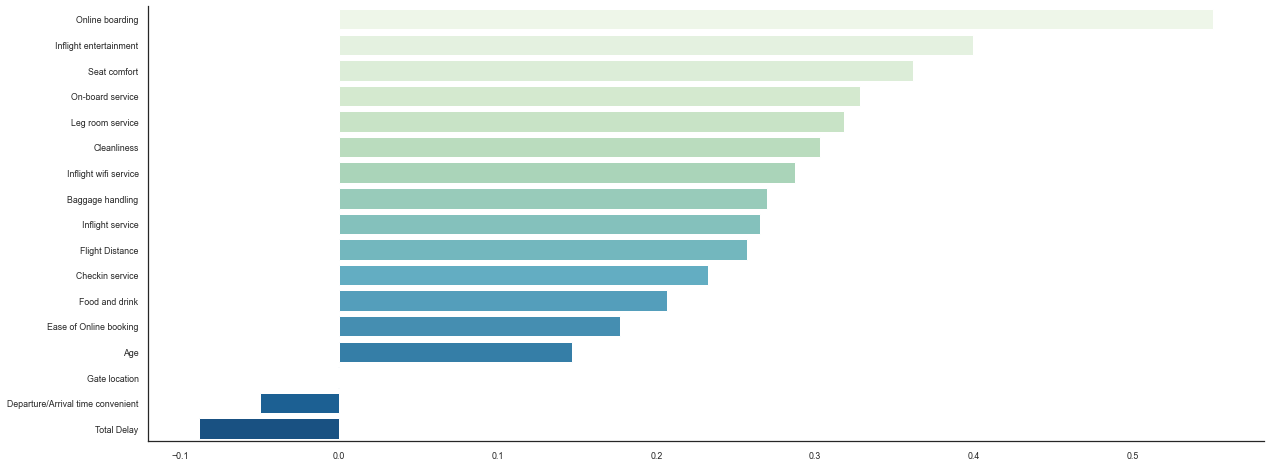

In [40]:
data_corr = df.copy()
data_corr['satisfaction'] = data_corr['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})
data_corr = data_corr.corr('spearman')['satisfaction'].sort_values(ascending=False)[1:]
fig,ax = plt.subplots(1,figsize=(20,8)) 
sns.barplot(y=data_corr.index,x=data_corr.values,ax=ax,palette='GnBu')
sns.despine()
plt.savefig('plot11.png',transparent=True, bbox_inches='tight')

In [41]:
data_corr

Online boarding                      0.550898
Inflight entertainment               0.399658
Seat comfort                         0.361879
On-board service                     0.328360
Leg room service                     0.318374
Cleanliness                          0.303288
Inflight wifi service                0.287396
Baggage handling                     0.269396
Inflight service                     0.265470
Flight Distance                      0.257359
Checkin service                      0.232316
Food and drink                       0.206949
Ease of Online booking               0.176913
Age                                  0.147061
Gate location                       -0.000386
Departure/Arrival time convenient   -0.049701
Total Delay                         -0.088316
Name: satisfaction, dtype: float64

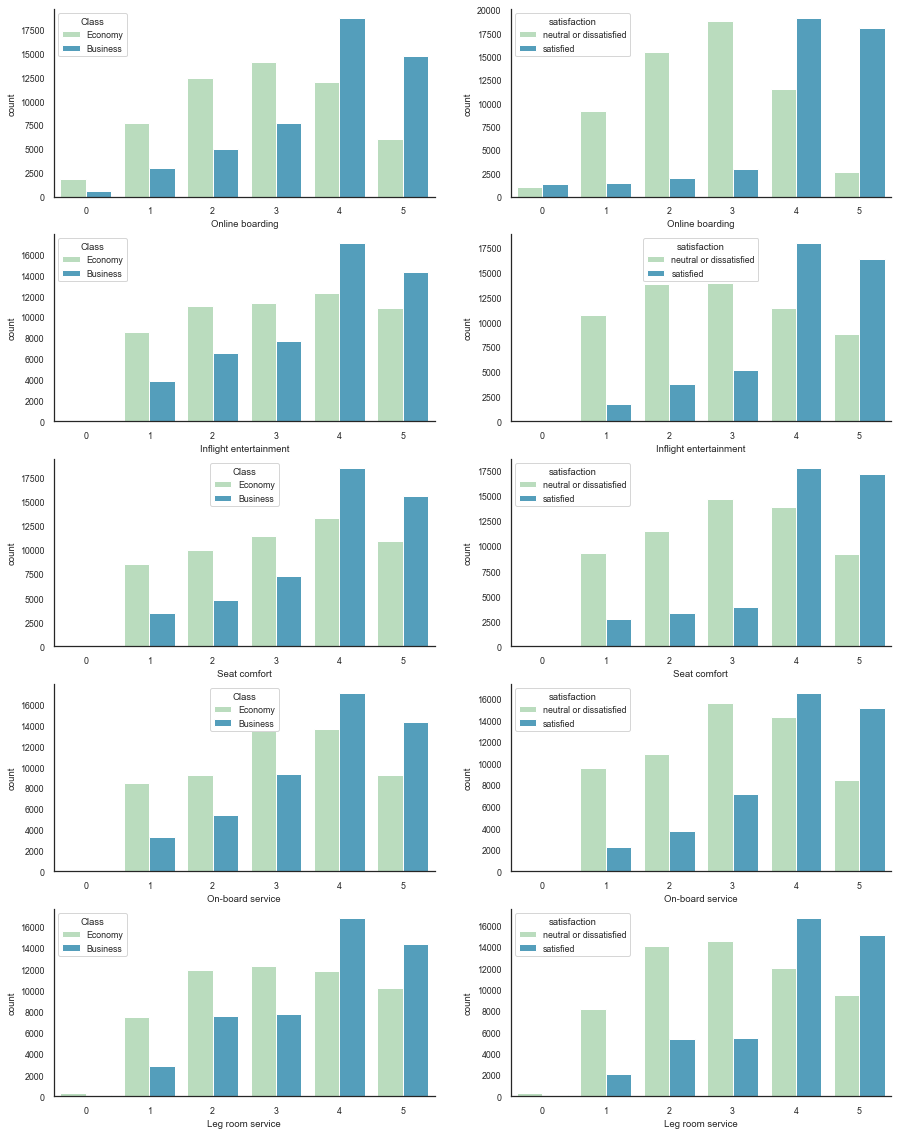

In [42]:
fig,ax = plt.subplots(5,2,figsize=(15,20))
sns.countplot(data=df,x='Online boarding',hue='Class', palette='GnBu',ax=ax[0,0])
sns.countplot(data=df,x='Online boarding',hue='satisfaction', palette='GnBu',ax=ax[0,1])
sns.countplot(data=df,x='Inflight entertainment',hue='Class', palette='GnBu',ax=ax[1,0])
sns.countplot(data=df,x='Inflight entertainment',hue='satisfaction', palette='GnBu',ax=ax[1,1])
sns.countplot(data=df,x='Seat comfort',hue='Class', palette='GnBu',ax=ax[2,0])
sns.countplot(data=df,x='Seat comfort',hue='satisfaction', palette='GnBu',ax=ax[2,1])
sns.countplot(data=df,x='On-board service',hue='Class', palette='GnBu',ax=ax[3,0])
sns.countplot(data=df,x='On-board service',hue='satisfaction', palette='GnBu',ax=ax[3,1])
sns.countplot(data=df,x='Leg room service',hue='Class', palette='GnBu',ax=ax[4,0])
sns.countplot(data=df,x='Leg room service',hue='satisfaction', palette='GnBu',ax=ax[4,1])
sns.despine()
plt.savefig('plot12.png',transparent=True, bbox_inches='tight')

Most of the rating by the Business class are higher rating than economy classes

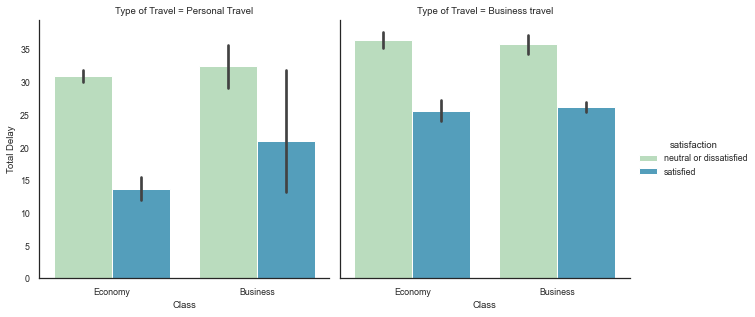

In [43]:
sns.catplot(x="Class", y="Total Delay", hue="satisfaction", col="Type of Travel",palette='GnBu', data=df, kind="bar", height=4.5, aspect=1.0)
plt.savefig('plot13.png',transparent=True, bbox_inches='tight')

Correlation value between total delay and satisfaction around -0.088316. The higher number of delay, the more dissatisfied customer

# Conclusion
### Insight Summary:
* The number of passenger who satisfied are 58697 (56.7%) while Neutral/Dissatisfied are 44897 (43.6%). There is sastisfaction gap about **13,1%**
* The number of men and women is approximately the same (51%:49%)
* The number of passenger who neutral/dissatisfied are higher compared to number of passenger who satisfied both of female or male.
* The vast majority of the airline's customers are loyal customers (82%). However loyal passengers are high in number, the number who neutral/dissatisfied are higher compared to sastisfied (43:39)
* More than half of the passengers were in economy class (52%)
* More than half of the passengers flew for business (69%) rather than personal reasons (31%)
* Customers whose flight distance is long tend to fly in business class.
* Most of the passengers who flew in **Economy Plus were dissatisfied with the flight, and those who flew in Business Class were satisfied**
* From age 7-to-38 and from age 61-to-79, dissatisfied passengers is very high compared to satisfied passengers. On the other hand, in age range 39-60, satisfied passengers is higher compared to dissatisfied passengers
* Almost all passengers who rated the wifi service 5 out of 5 were satisfied with the flight. The correlation value with satisfaction about 0.287.
* Top 5 highest correlation to satisfaction: **online boarding with 0.55, inflight entertainment 0.39, seat comfort with 0.36, on-board service with 0.32 and leg-room service with 0.31.**
* Most of the rating by the Business class are higher rating than economy class.
* The higher number of delay, the more dissatisfied customer

### Recomendation:
* Remote work and other flexible working arrangements are likely to remain in some form postpandemic and people will take fewer business travel. So, airline should focus on segment: **personal travel and economy class**
* Airline should focus on improving the **Inflight Wi-Fi Service, Online boarding, Inflight entertainment, Seat comfort, On-board service and Leg room service**